In [1]:
import sqlite3
import random

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()

# Drop the sales table if it exists
cursor.execute('DROP TABLE IF EXISTS sales')

# Create table with the specified schema
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    city TEXT,
    item TEXT,
    year TEXT,
    amount REAL,
    PRIMARY KEY (city, item, year)
)
''')

# List of 25 US city names
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
             'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Charlotte', 'San Francisco', 'Indianapolis', 'Seattle', 'Denver', 'Washington',
             'Boston', 'El Paso', 'Nashville', 'Detroit', 'Oklahoma City']

# List of 25 electronics products
products = ['Laptop', 'Smartphone', 'Tablet', 'Smartwatch', 'Camera', 'Headphones', 'Speaker', 'Monitor', 'Keyboard', 'Mouse',
            'Printer', 'Router', 'Drone', 'VR Headset', 'Smart TV', 'Projector', 'Game Console', 'E-Reader', 'Fitness Tracker',
            'Smart Home Hub', 'External Hard Drive', 'USB Flash Drive', 'Memory Card', 'Power Bank', 'Charger']

# Years from 2000 to 2022
years = list(range(2000, 2023))

random.seed(0)

# Insert records into the table

for city in cities:
    for product in products:
        for year in years:
            amount = random.randint(1000, 10000)
            cursor.execute('''
                INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)
                ''', (city, product, year, amount))
# Commit the changes and close the connection
conn.commit()

conn.close()

Number of records Step 0: 14375
Number of records Step 1: 14448
Number of records Step 2: 16223
Number of records Step 3: 16224
Part 3.1 Time: 0.0009992122650146484
Part 3.2 Time: 0.0


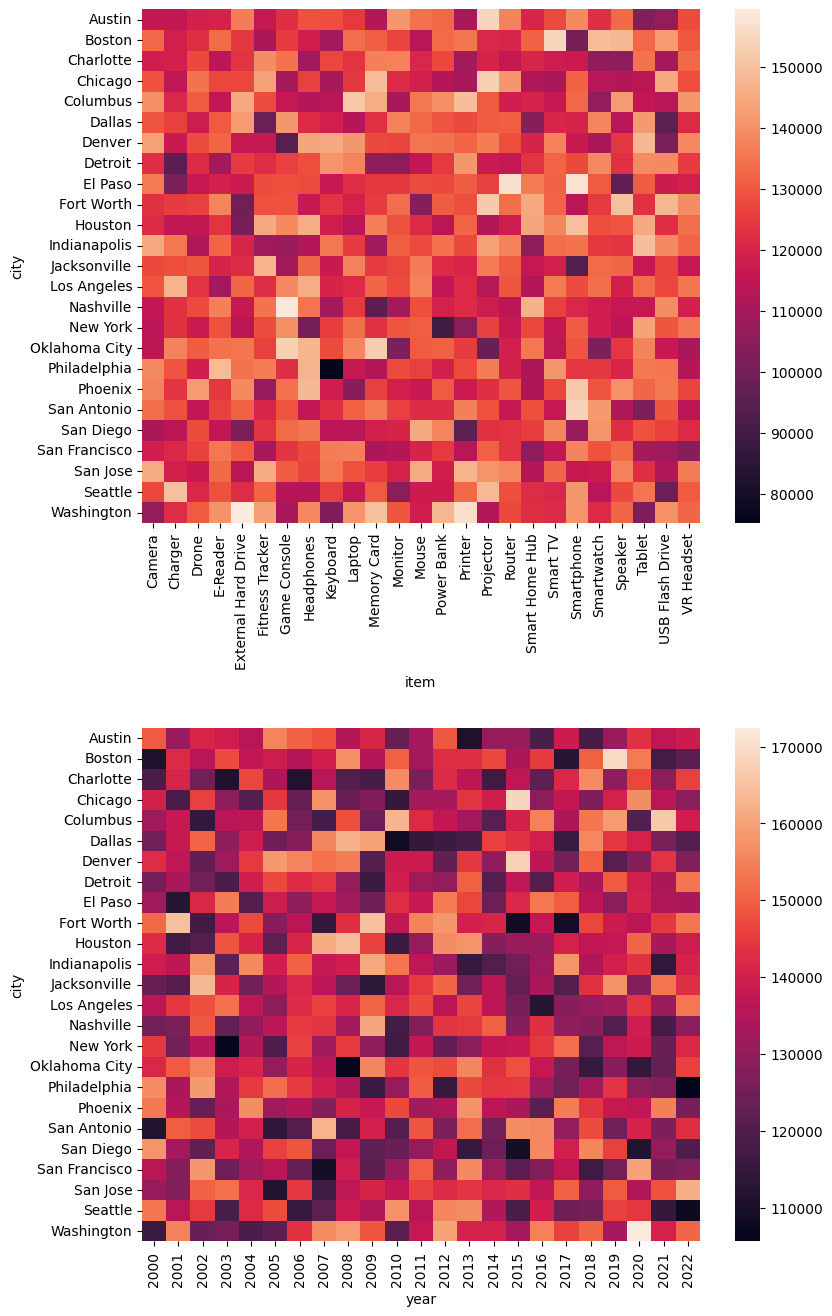

In [2]:
import sqlite3
import os
import time
import pandas
import seaborn
import matplotlib.pyplot

def time_query(query):
    start_time = time.time()
    cursor.execute(query)
    all_items = cursor.fetchall()
    end_time = time.time()
    query_time = end_time - start_time
    return query_time

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()

### Part 1:
#1. Write a query to retrieve all unique city names from the sales table.
#(This is an example of how to get the results of a query from the database
#into a python list of tuples.  Try printing out "results" )

#Sample Answer
cursor.execute('SELECT DISTINCT city FROM sales')
results = cursor.fetchall()
cities = [row[0] for row in results]
# print(results)



# 2. Modify the above SQL query to retrieve all unique items sold in the sales table.
cursor.execute('SELECT DISTINCT item FROM sales')
...
results = cursor.fetchall()
items = [row[0] for row in results]
# print(results)

#3. Create a query to retrieve all distinct years of sales data from the sales table.

cursor.execute('SELECT DISTINCT year FROM sales')
...
results = cursor.fetchall()
years = [row[0] for row in results]
# print(results)



# (Get the size of the database)
cursor.execute('SELECT count(*) FROM sales')
print(f'Number of records Step 0: {cursor.fetchone()[0]}')


### Part 2: Creating 1D Cuboids

# 1. First create and execute a single GROUPBY query that obtains the sales for each city.
# Then, for each tuple returned, insert into the table a new record for that city
# and amount with the string 'ALL' in the positions that have been aggregated away
# don't forget to commit your changes to the database!

cursor.execute('SELECT city, SUM(amount) FROM sales GROUP BY city')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', (result[0], 'ALL', 'ALL', result[1]))
conn.commit()

#2. Modify the above query to calculate the total sales amount for each item.
#(Follow the steps as described in part 2 question 1)

cursor.execute('SELECT item, SUM(amount) FROM sales WHERE item != "ALL" GROUP BY item')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', ('ALL', result[0], 'ALL', result[1]))
conn.commit()

#3. Write a query to find the total sales amount for each year.
#(Follow the steps as described in part 2 question 1)

cursor.execute('SELECT year, SUM(amount) FROM sales WHERE year != "ALL" GROUP BY year')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', ('ALL', 'ALL', result[0], result[1]))
conn.commit()



# Get the size of the database
cursor.execute('SELECT count(*) FROM sales')
print(f'Number of records Step 1: {cursor.fetchone()[0]}')

# Extend the above strategy to create all two-D cuboids.

#4. Write a query to calculate the total sales amount for each city-item combination.
cursor.execute('SELECT city, item, SUM(amount) FROM sales WHERE city != "ALL" AND item != "ALL" GROUP BY city, item')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', (result[0], result[1], 'ALL', result[2]))
conn.commit()



#5. Modify the above query to retrieve total sales amounts for each city-year combination.

cursor.execute('SELECT city, year, SUM(amount) FROM sales WHERE city != "ALL" AND year != "ALL" GROUP BY city, year')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', (result[0], 'ALL', result[1], result[2]))
conn.commit()



#6. Modify the above query to calculate total sales for each item-year combination

cursor.execute('SELECT item, year, SUM(amount) FROM sales WHERE item != "ALL" AND year != "ALL" GROUP BY item, year')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', ('ALL', result[0], result[1], result[2]))
conn.commit()

# Get the size of the database
cursor.execute('SELECT count(*) FROM sales')
print(f'Number of records Step 2: {cursor.fetchone()[0]}')

# Creating the zero-D cuboid.
#7. Write a query to retrieve the total sales amount across all dimensions (city, item, year).

cursor.execute('SELECT SUM(amount) FROM sales')
results = cursor.fetchall()
# print(results)
for result in results:
    cursor.execute('INSERT INTO sales (city, item, year, amount) VALUES (?, ?, ?, ?)', ('ALL', 'ALL', 'ALL', result[0]))
conn.commit()


# Get the size of the database
cursor.execute('SELECT count(*) FROM sales')
print(f'Number of records Step 3: {cursor.fetchone()[0]}')

## Part 3: performance

# 1.Use the time_query function to measure how long it takes to retrieve the
#total sales amount from the sales table. (Make sure to exclude all the rows
#which have the string value of ‘ALL’ ).

print('Part 3.1 Time: ' + str(time_query('SELECT SUM(amount) FROM sales WHERE city != "ALL" AND item != "ALL" AND year != "ALL"')))


# 2. Using the time_query function, measure the time taken to retrieve the amount
#value from the sales table where city, item, and year are all set to 'ALL'.
#This row represents the grand total of all sales. Write code to time this query
#and print the time in milliseconds.

print('Part 3.2 Time: ' + str(time_query('SELECT SUM(amount) FROM sales WHERE city = "ALL" AND item = "ALL" AND year = "ALL"')))


## Part 4: visualization

figure, axes = matplotlib.pyplot.subplots(2, figsize = (9,16))
matplotlib.pyplot.subplots_adjust(hspace = 0.4)

# 1. Create a heatmap using seaborn showing the total sales amount for each city
# and item combination. Use pivot_table to structure the data.

df = pandas.read_sql_query('SELECT city, item, amount FROM sales WHERE year = "ALL" AND city != "ALL" AND item != "ALL"', conn)
data = df.pivot_table(values = "amount", index = "city", columns = "item")
seaborn.heatmap(data = data, ax = axes[0])


# 2. Create a heatmap using seaborn showing the total sales amount for each item
# and year combination. Use pivot_table to structure the data.

df2 = pandas.read_sql_query('SELECT city, year, amount FROM sales WHERE item = "ALL" AND city != "ALL" AND year != "ALL"', conn)
data2 = df2.pivot_table(values = "amount", index = "city", columns = "year")
seaborn.heatmap(data = data2, ax = axes[1])

conn.close()